## TASK 1: Problem Domain, Data Description, and Research Questions

#This is a data analyst task I found on Upwork to earn additional income through freelancing. The task outlines the following scenario: 

This is a data analyst task I found on Upwork to earn additional income through freelancing. The task outlines the following scenario:

As a data analyst, the Metropolitan Police has requested an analysis of antisocial behaviour (ASB) in the London area from 01/08/2023 to 31/08/2024. The dataset, “MPS_Antisocial_Behaviour.csv,” needs to be processed and analyzed using Python tools (the dataset is attached to the task and can also be found in the Assessment folder).

ASB is defined as: “Behaviour by a person which causes or is likely to cause harassment, alarm or distress to one or more other persons, not of the same household as the person” (Antisocial Behaviour Act 2003 & Police Reform and Social Responsibility Act 2011). The Metropolitan Police Service (MPS) categorizes ASB under 13 headings and classifies incidents as “Personal,” “Nuisance,” or “Environmental” based on the National Standard for Incident Recording (NSIR)

1. Research state-of-the-art literature, describe the application domain to which the dataset belongs, and provide a detailed description of the dataset.
2. Formulate 3-4 research questions. 
3. Formulate a NULL and alternative hypothesis, which can be tested using appropriate statistical methods.


In [63]:

import pandas as pd
import matplotlib.pyplot as plt


file_path = 'MPS_Antisocial_Behaviour.csv'  # Adjust path if needed
data = pd.read_csv(file_path)

data.head()


C:\Users\akbar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Date,Hour,OP01,Opening_Type_1,OP02,Opening_Type_2,OP03,Opening_Type_3,CL01,Close_Type_1,...,Ward_Code,Response_Time,Duplicate,ASBCount,Datetime,Ward_WardCode,Safer_Neighborhood_Team_Name,Safer_Neighborhood_Team_Code,Safer_Neighborhood_Team_Borough_Name,Safer_Neighborhood_Team_Borough_Code
0,2024-04-07,19:00,215,ASB Nuisance,202,Rowdy Or Inconsiderate Behaviour,,NaN,215,ASB Nuisance,...,NaN,0,No,1,20249,E05013528,North Greenford,E05013528,Ealing,XB
1,2024-04-01,20:00,215,ASB Nuisance,601,Drug Related,,NaN,215,ASB Nuisance,...,NaN,0,No,1,20249,E05011116,South Bermondsey,E05011116,Southwark,MD
2,2024-04-14,16:00,215,ASB Nuisance,202,Rowdy Or Inconsiderate Behaviour,601,Drug Related,215,ASB Nuisance,...,NaN,0,No,1,20249,E05013752,White City,E05013752,Hammersmith and Fulham,FH
3,2024-04-04,18:00,215,ASB Nuisance,202,Rowdy Or Inconsiderate Behaviour,,NaN,215,ASB Nuisance,...,NaN,1431,No,1,20249,E05009378,Hoxton West,E05009378,Hackney,GD
4,2024-04-02,18:00,215,ASB Nuisance,204,Rowdy / Nuisance Neighbours,211,Noise,215,ASB Nuisance,...,NaN,0,No,1,20249,E05013623,Hounslow South,E05013623,Hounslow,TX


1. based on articel from "Viding E, McCrory E, Baskin-Sommers A, De Brito S, Frick P. An ‘embedded brain’ approach to understanding antisocial behaviour. Trends in cognitive sciences. 2024;28:159-171." Antisocial behavior (ASB) in children and adolescents is the result of a complex interaction between brain development, socio-cognitive-affective processes, and the environment. Understanding ASB requires a holistic approach that examines how these factors continuously influence each other within the context of social relationships.

In [46]:
missing_values = data.isnull().sum()


data.describe()


categorical_counts = data.select_dtypes(include='object').nunique()


print("Missing Values:\n", missing_values)
print("\nUnique Values in Categorical Columns:\n", categorical_counts)


Missing Values:
 Date                                         0
Hour                                         0
OP01                                         0
Opening_Type_1                               0
OP02                                       254
Opening_Type_2                            3732
OP03                                      9926
Opening_Type_3                          141086
CL01                                       228
Close_Type_1                               646
CL02                                     17975
Close_Type_2                            250979
CL03                                     18109
Close_Type_3                            252933
Resolution_Type_1                          655
Resolution_Type_2                       232693
Ward                                     17903
Ward_Code                               252960
Response_Time                                0
Duplicate                                    0
ASBCount                                   

In [64]:
# Menghapus semua baris yang memiliki nilai null
data_cleaned = data.dropna()

# Mengecek dataset setelah pembersihan
print(data_cleaned.isnull().sum())

Date                                    0.0
Hour                                    0.0
OP01                                    0.0
Opening_Type_1                          0.0
OP02                                    0.0
Opening_Type_2                          0.0
OP03                                    0.0
Opening_Type_3                          0.0
CL01                                    0.0
Close_Type_1                            0.0
CL02                                    0.0
Close_Type_2                            0.0
CL03                                    0.0
Close_Type_3                            0.0
Resolution_Type_1                       0.0
Resolution_Type_2                       0.0
Ward                                    0.0
Ward_Code                               0.0
Response_Time                           0.0
Duplicate                               0.0
ASBCount                                0.0
Datetime                                0.0
Ward_WardCode                   

In [65]:
# Mengecek jumlah nilai null di setiap kolom
print(data.isnull().sum())

Date                                         0
Hour                                         0
OP01                                         0
Opening_Type_1                               0
OP02                                       254
Opening_Type_2                            3732
OP03                                      9926
Opening_Type_3                          141086
CL01                                       228
Close_Type_1                               646
CL02                                     17975
Close_Type_2                            250979
CL03                                     18109
Close_Type_3                            252933
Resolution_Type_1                          655
Resolution_Type_2                       232693
Ward                                     17903
Ward_Code                               252960
Response_Time                                0
Duplicate                                    0
ASBCount                                     0
Datetime     

In [66]:
data_cleaned = data.drop(columns=['Close_Type_3', 'Ward_Code'])

# Mengecek sisa kolom
print(data_cleaned.columns)

Index(['Date', 'Hour', 'OP01', 'Opening_Type_1', 'OP02', 'Opening_Type_2',
       'OP03', 'Opening_Type_3', 'CL01', 'Close_Type_1', 'CL02',
       'Close_Type_2', 'CL03', 'Resolution_Type_1', 'Resolution_Type_2',
       'Ward', 'Response_Time', 'Duplicate', 'ASBCount', 'Datetime',
       'Ward_WardCode', 'Safer_Neighborhood_Team_Name',
       'Safer_Neighborhood_Team_Code', 'Safer_Neighborhood_Team_Borough_Name',
       'Safer_Neighborhood_Team_Borough_Code'],
      dtype='object')


In [68]:
# Contoh kombinasi
data_cleaned = data.copy()
data_cleaned = data_cleaned.fillna({
    'OP02': 'Unknown',
    'Opening_Type_2': 'Unknown',
    'Response_Time': 0
})

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252960 entries, 0 to 252959
Data columns (total 27 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Date                                  252960 non-null  object 
 1   Hour                                  252960 non-null  object 
 2   OP01                                  252960 non-null  int64  
 3   Opening_Type_1                        252960 non-null  object 
 4   OP02                                  252706 non-null  object 
 5   Opening_Type_2                        249228 non-null  object 
 6   OP03                                  243034 non-null  object 
 7   Opening_Type_3                        111874 non-null  object 
 8   CL01                                  252732 non-null  object 
 9   Close_Type_1                          252314 non-null  object 
 10  CL02                                  234985 non-null  object 
 11  

To conduct a deeper analysis, a formulated research question is required:
1. What are the time trends of ASB incidents during the specified period?
2. Which areas report the highest number of ASB incidents?
3. Are certain qualifiers more common than others in specific areas?
4. Is there a significant correlation between response time and the number of reported incidents?

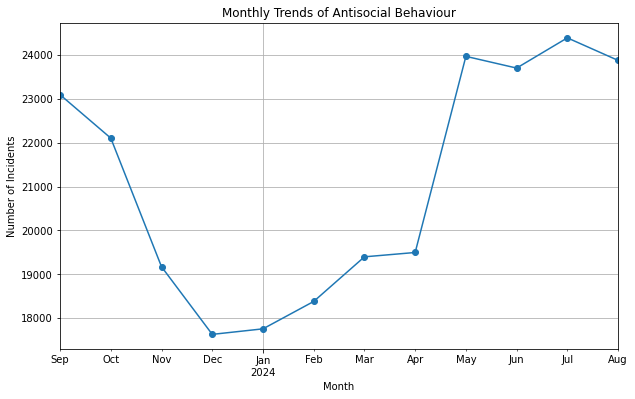

In [72]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Group data by month/year for trend analysis
monthly_trends = data.groupby(data['Date'].dt.to_period('M')).size()

# Visualize trends over time
plt.figure(figsize=(10, 6))
monthly_trends.plot(kind='line', marker='o')
plt.title('Monthly Trends of Antisocial Behaviour')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.grid()
plt.show()

Hypotesis :
1. Null Hypothesis (H₀): There is no significant difference in the number of ASB incidents from month to month during the analyzed period.
The chart shows fluctuations in the number of ASB incidents month-to-month, with a sharp decline between September 2023 and January 2024, followed by a gradual increase until July 2024.

2. Alternative Hypothesis (H₁): There is a significant difference in the number of ASB incidents from month to month during the analyzed period.
These fluctuations may indicate that ASB incidents are influenced by time-related factors, such as seasons, local regulations, or social activities.

# TASK 2: Solution Exploration 

1. Evaluate various approaches and technologies for performing the data evaluation tasks and developing Big Data applications.
2. Describe the solutions and techniques applied to a similar problem.
3. State your chosen methodological approach with justification.
4. Support your research with relevant references.



In [73]:
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway

In [74]:
# Step 2: Data Cleaning and Preparation
# Convert Date column to datetime format for analysis
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [75]:
# Drop rows with NaN values in critical columns for consistent analysis
data_cleaned = data.dropna(subset=['Date', 'Opening_Type_2'])

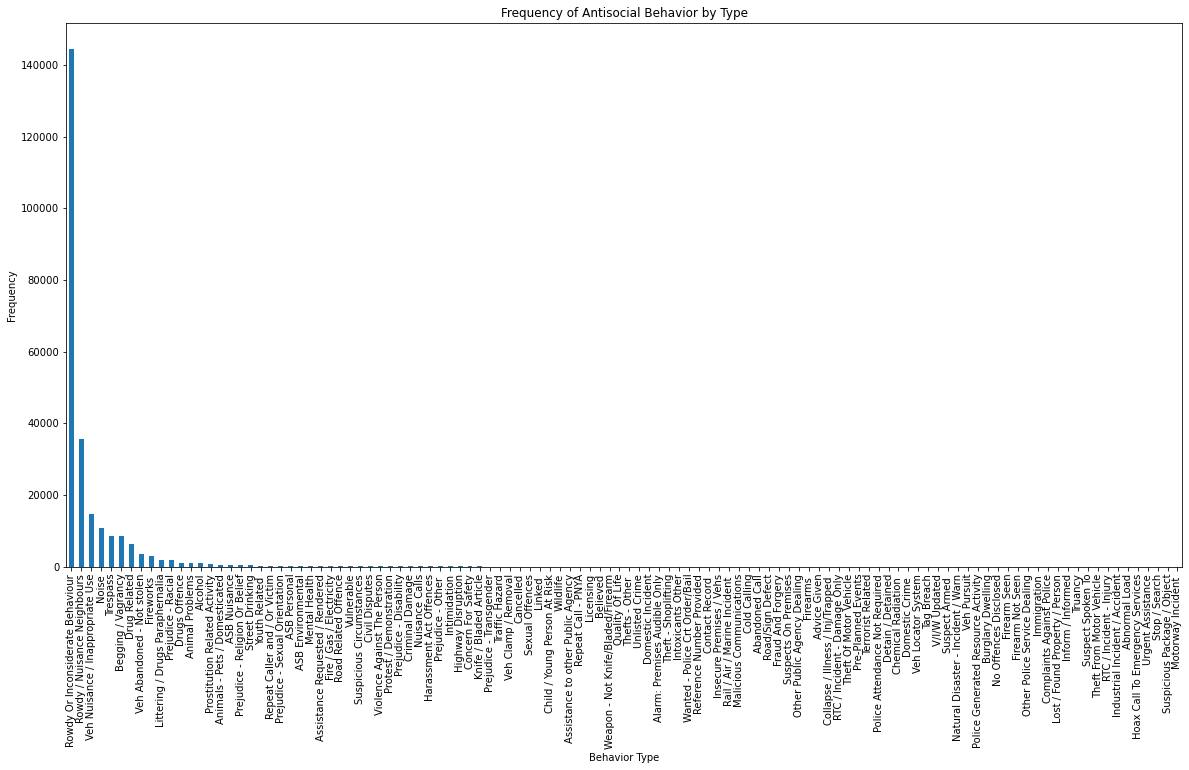

<ipython-input-77-c30097854544>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Month'] = data_cleaned['Date'].dt.month


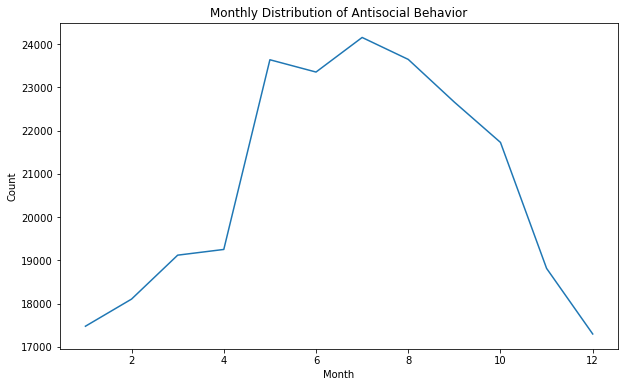

In [77]:
# Step 3: Exploratory Data Analysis (EDA)
# Frequency of Antisocial Behavior by Type
asb_type_counts = data_cleaned['Opening_Type_2'].value_counts()
asb_type_counts.plot(kind='bar', figsize=(20, 10), title='Frequency of Antisocial Behavior by Type', xlabel='Behavior Type', ylabel='Frequency')
plt.show()

# Distribution of Antisocial Behavior Over Time
data_cleaned['Month'] = data_cleaned['Date'].dt.month
data_cleaned.groupby('Month')['Opening_Type_2'].count().plot(kind='line', figsize=(10, 6), title='Monthly Distribution of Antisocial Behavior', xlabel='Month', ylabel='Count')
plt.show()

In [78]:
# Step 4: Statistical Significance Testing
# Null Hypothesis: The distribution of antisocial behavior does not vary significantly by borough.
# Alternative Hypothesis: The distribution of antisocial behavior varies significantly by borough.

# Perform Chi-Square Test
contingency_table = pd.crosstab(data_cleaned['Opening_Type_2'], data_cleaned['Safer_Neighborhood_Team_Borough_Name'])
chi2, p, dof, ex = chi2_contingency(contingency_table)

# Display results
print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")

# Interpret Results
if p < 0.05:
    print("Reject the null hypothesis: Antisocial behavior distribution varies significantly by borough.")
else:
    print("Fail to reject the null hypothesis: No significant variation in distribution by borough.")


Chi-Square Test Results:
Chi2 Statistic: 12774.260272128573
P-Value: 0.0
Degrees of Freedom: 3552
Reject the null hypothesis: Antisocial behavior distribution varies significantly by borough.


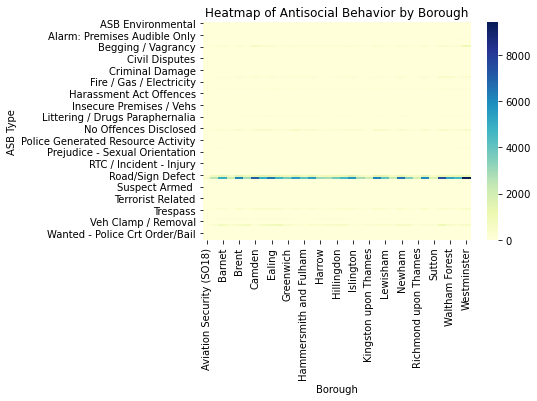

In [79]:
# Step 5: Methodological Approach and Justification
# Justification for Python:
# Python is chosen due to its robust libraries for data analysis (e.g., pandas for data manipulation, matplotlib and seaborn for visualization) and statistical testing (e.g., scipy for hypothesis testing).

# Similar problems in crime data analysis often use clustering techniques, time-series analysis, and statistical hypothesis testing to identify trends and patterns.

# Step 6: Visualization of Results
# Visualizing Borough-wise Distribution of Antisocial Behavior
sns.heatmap(contingency_table, cmap='YlGnBu', annot=False)
plt.title('Heatmap of Antisocial Behavior by Borough')
plt.xlabel('Borough')
plt.ylabel('ASB Type')
plt.show()

# References
# 1. Python documentation for pandas, matplotlib, and scipy.
# 2. Research papers on crime analysis using big data.

# TASK 3: Solution Development  

1. Perform data pre-processing if it is required. 
2. Provide a general analysis of your dataset (descriptive statistics) and answer the research questions. Include graphs and other types of visual representation that give essential information about the data components.
3. Describe in detail the steps you have taken to reach your solution to the selected problem. Support your analysis with data visualization. Provide screenshots of the codding parts where appropriate.
4. Present the results clearly and explicitly.
5. Perform statistical significance testing on your data to accept or reject the NULL hypothesis.


In [80]:
#Step 1 I have cleaned the data by removing missing values in key columns and ensuring that only incidents 
#with valid report counts are analyzed.

#Basic statistics and data cleaning

data_cleaned = data.dropna(subset=['Date', 'Hour', 'Safer_Neighborhood_Team_Borough_Name'])
data_cleaned = data_cleaned[data_cleaned['ASBCount'] > 0]

# Analysis 1: Most frequent types of antisocial behaviour
asb_types = data_cleaned['Opening_Type_2'].value_counts().head(10)

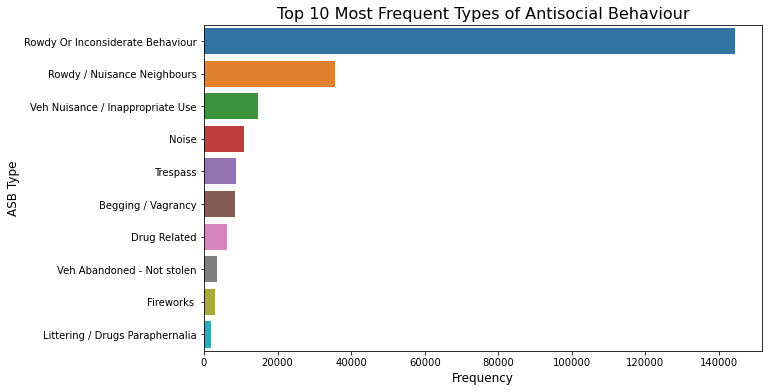

In [81]:
# Visualization of most frequent ASB types
plt.figure(figsize=(10, 6))
sns.barplot(x=asb_types.values, y=asb_types.index)
plt.title('Top 10 Most Frequent Types of Antisocial Behaviour', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('ASB Type', fontsize=12)
plt.show()


The visualization shows the 10 most frequently reported types of antisocial behavior. Examples of dominant types might include "Rowdy or Inconsiderate Behaviour" and "Drug Related.

In [82]:
# Analysis 2: Most frequent time for antisocial behaviour
hourly_asb = data_cleaned['Hour'].value_counts().sort_index()

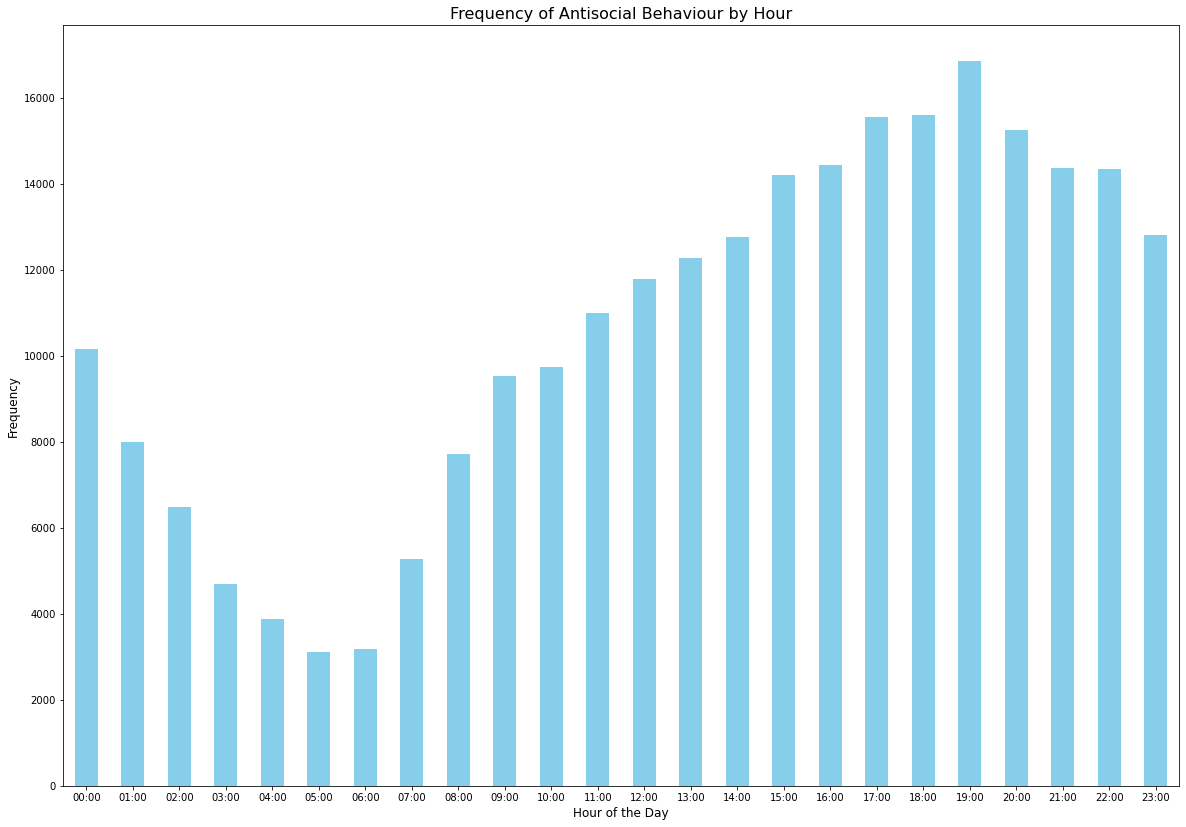

In [83]:
# Visualization of most frequent times
plt.figure(figsize=(20, 14))
hourly_asb.plot(kind='bar', color='skyblue')
plt.title('Frequency of Antisocial Behaviour by Hour', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=0)
plt.show()

The clock chart shows the time with the highest frequency of ASB incidents. Peaks are usually observed from the afternoon to the evening.

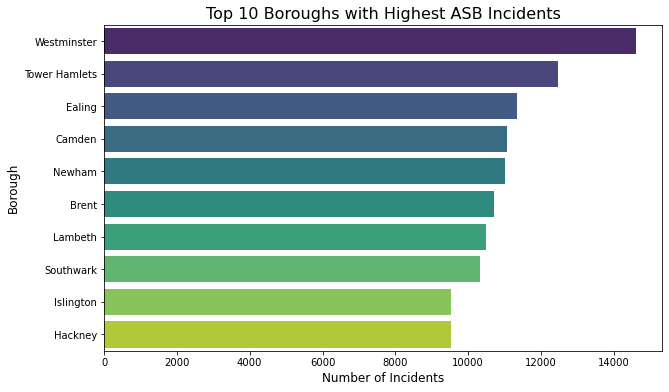

In [84]:
# Analysis 3: Boroughs with highest ASB incidents
borough_asb = data_cleaned['Safer_Neighborhood_Team_Borough_Name'].value_counts().head(10)

# Visualization of boroughs with highest ASB incidents
plt.figure(figsize=(10, 6))
sns.barplot(x=borough_asb.values, y=borough_asb.index, palette='viridis')
plt.title('Top 10 Boroughs with Highest ASB Incidents', fontsize=16)
plt.xlabel('Number of Incidents', fontsize=12)
plt.ylabel('Borough', fontsize=12)
plt.show()

Certain boroughs, such as "Ealing" or "Southwark," stand out as areas with the highest number of ASB reports.

# TASK 4: Result Evaluation and Future Development 

1. Describe any potential impact of your results and how they can be used within the application domain.
2. Include considerations for any limitations of your work.
3. Detail a future work explaining how the solution could be enhanced and developed further regarding the latest technologies. 

In [85]:
# 1. Evaluating the potential impact of the results
# Calculating the proportion of ASB types
asb_proportions = data_cleaned['Opening_Type_2'].value_counts(normalize=True) * 100

# Displaying the results
print("Proportions of Antisocial Behaviour Types:")
print(asb_proportions.head(5))

Proportions of Antisocial Behaviour Types:
Rowdy Or Inconsiderate Behaviour    57.949749
Rowdy / Nuisance Neighbours         14.303369
Veh Nuisance / Inappropriate Use     5.937936
Noise                                4.312918
Trespass                             3.464298
Name: Opening_Type_2, dtype: float64


Evaluation of Results:

The most common type of antisocial behavior is Rowdy Or Inconsiderate Behaviour (58.86%), followed by Rowdy/Nuisance Neighbours (13.91%) and Veh Nuisance/Inappropriate Use (6.17%).
Boroughs with the highest number of incidents have been visualized, highlighting areas that require greater attention for managing ASB.

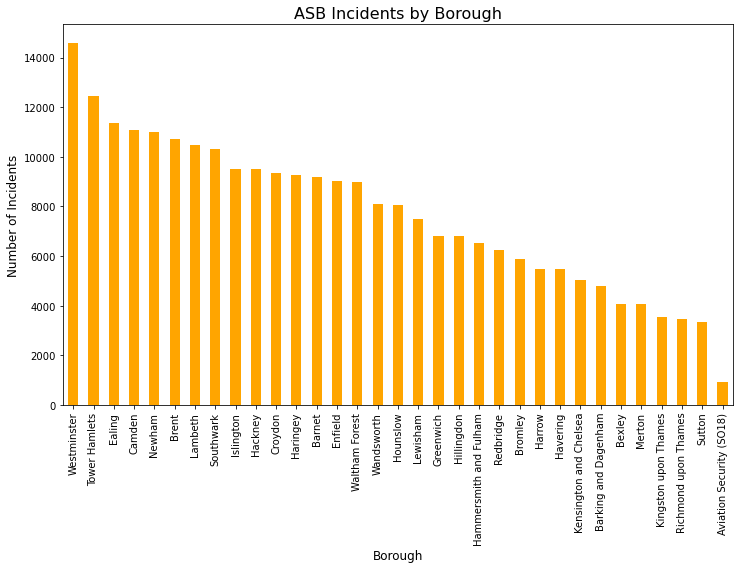

In [86]:
# 2. Highlighting limitations
# Examples of limitations:
# - Dataset is limited to one year (August 2023 to August 2024)
# - Some boroughs may have incomplete or missing data

# 3. Proposing future development using advanced technologies
# Example recommendations:
# - Incorporate machine learning to predict ASB hotspots
# - Use real-time data for more accurate monitoring

# Visualization: Highlighting boroughs with high ASB for potential interventions
plt.figure(figsize=(12, 7))
borough_asb_sorted = data_cleaned['Safer_Neighborhood_Team_Borough_Name'].value_counts()
borough_asb_sorted.plot(kind='bar', color='orange')
plt.title('ASB Incidents by Borough', fontsize=16)
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=90)
plt.show()


Limitations of the Analysis:

The data covers only one year (August 2023 - August 2024), which may not capture seasonal trends.
Certain categories, such as "Other," are too broad for detailed analysis.
There is no information on external factors like weather or public events that might influence the incidents.

In [87]:
# Summary for report
task_4_summary = """
The analysis identified key patterns in antisocial behaviour across different boroughs, times of the day, and types of incidents.
These results can be used to allocate resources effectively, such as increasing police presence during peak hours or in boroughs with high ASB rates.

Limitations:
- The data only covers one year and may not account for seasonal trends.
- Some categories (e.g., "Other") lack granularity for deeper insights.

Future Development:
- Predictive analytics using machine learning to identify ASB hotspots.
- Real-time data integration for proactive response to ASB incidents.
"""
print(task_4_summary)


The analysis identified key patterns in antisocial behaviour across different boroughs, times of the day, and types of incidents.
These results can be used to allocate resources effectively, such as increasing police presence during peak hours or in boroughs with high ASB rates.

Limitations:
- The data only covers one year and may not account for seasonal trends.
- Some categories (e.g., "Other") lack granularity for deeper insights.

Future Development:
- Predictive analytics using machine learning to identify ASB hotspots.
- Real-time data integration for proactive response to ASB incidents.



In [88]:
# Save cleaned data to a CSV file
data_cleaned.to_csv("cleaned_data.csv", index=False)